# Question 1

# Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as numpy

# Step 2. Import the dataset
# Step 3. Assign it to a variable called users 

In [73]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')

In [74]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
users_indexes = users.set_index('user_id')

In [5]:
print(users_indexes)

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
...      ...    ...            ...      ...
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M        student    97229
942       48      F      librarian    78209
943       22      M        student    77841

[943 rows x 4 columns]


# Step 4. Discover what is the mean age per occupation

In [6]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [81]:
users['is_male'] = users.gender.apply(lambda x: True if x == 'M' else False)
(users.groupby('occupation').is_male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

# Step 6: For each occupation, calculate the minimum and maximum ages

In [8]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


# Step 7. For each combination of occupation and sex, calculate the mean age

In [9]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# Step 8. For each occupation present the percentage of women and men

In [82]:
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occup_count = users.groupby(['occupation']).count()

occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

# Question 2

# Step 1. Import the necessary libraries

In [11]:
import pandas as pd

# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called euro12.

In [12]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


# Step 4. Select only the Goal column.

In [13]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

# Step 5. How many team participated in the Euro2012?

In [14]:
Team = euro12['Team'].count()
print('Total Teams: ',Team)

Total Teams:  16


# Step 6. What is the number of columns in the dataset?

In [15]:
print("Total Number of Columns: ",len(euro12.columns))

Total Number of Columns:  35


# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [16]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [17]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


# Step 9. Calculate the mean Yellow Cards given per Team

In [18]:
mean = discipline['Yellow Cards'].mean()
print("Mean is :", mean)

Mean is : 7.4375


# Step 10. Filter teams that scored more than 6 goals

In [19]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


# Step 11. Select the teams that start with G

In [20]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Step 12. Select the first 7 columns

In [83]:
euro12.iloc[: , 0:7]

NameError: name 'euro12' is not defined

# Step 13. Select all columns except the last 3.

In [22]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [23]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

# Step 1. Import the necessary libraries


In [84]:
import pandas as pd
import numpy as np

# Step 2. Create 3 differents Series, each of length 100, as follows:
 <p> 1. The first a random number from 1 to 4</p>
 <p> 2. The second a random number from 1 to 3</p>
 <p> 3. The third a random number from 10,000 to 30,000</p>

In [85]:
series_1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series_2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series_3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(series_1, series_2, series_3)


0     2
1     2
2     4
3     2
4     1
     ..
95    2
96    2
97    2
98    2
99    4
Length: 100, dtype: int32 0     1
1     1
2     2
3     3
4     3
     ..
95    3
96    2
97    3
98    2
99    1
Length: 100, dtype: int32 0     11067
1     23715
2     29750
3     14216
4     23013
      ...  
95    24804
96    20314
97    15348
98    12569
99    21079
Length: 100, dtype: int32


# Step 3. Create a DataFrame by joinning the Series by column


In [86]:
house = pd.concat([series_1, series_2, series_3], axis=1)
house

,0,1,2
0,2,1,11067
1,2,1,23715
2,4,2,29750
3,2,3,14216
4,1,3,23013
...,...,...,...
95,2,3,24804
96,2,2,20314
97,2,3,15348
98,2,2,12569


# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [87]:
house.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
house.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,11067
1,2,1,23715
2,4,2,29750
3,2,3,14216
4,1,3,23013


# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [88]:
column = pd.concat([series_1, series_2, series_3], axis=0)

column = column.to_frame()
print(type(column))

column

<class 'pandas.core.frame.DataFrame'>


,0
0,2
1,2
2,4
3,2
4,1
...,...
95,24804
96,20314
97,15348
98,12569


# Step 6. Ops it seems it is going only until index 99. Is it true?


In [89]:
len(column)

300

# Step 7. Reindex the DataFrame so it goes from 0 to 299

In [90]:
column.reset_index(drop=True, inplace=True)
column

,0
0,2
1,2
2,4
3,2
4,1
...,...
295,24804
296,20314
297,15348
298,12569


# Question 4

# Step 1. Import the necessary libraries

In [31]:
import pandas as pd
import numpy as np

# Step 2. Import the dataset

In [36]:
data = pd.read_csv('Wind.txt')
data
#Note: Professor, while reading text file, I was having issue merging the headers together
#So had to convert text to csv and upload the csv version of it in order to execute further questions
#I hope you consider this.

,Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
0,61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 1...
1,61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 1...
2,61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 1...
3,61 1 4 10.58 6.63 11.75 4.58 4.54 2.88 ...
4,61 1 5 13.33 13.25 11.42 6.17 10.71 8.21 1...
...,...
6569,78 12 27 17.58 16.96 17.62 8.08 13.21 11.67 1...
6570,78 12 28 13.21 5.46 13.46 5.00 8.12 9.42 1...
6571,78 12 29 14.00 10.29 14.42 8.71 9.71 10.54 1...
6572,78 12 30 18.50 14.04 21.29 9.13 12.75 9.71 1...


In [37]:
data = pd.read_csv('Wind.csv')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [38]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [40]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [54]:
Data = data.set_index("Date")
Data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [55]:
print(Data.isnull().values.ravel().sum())

31


# Step 7. Compute how many non-missing values there are in total.

In [56]:
x=Data.count()
print("Total Non-missing values are :",x.sum())

Total Non-missing values are : 78857


# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [57]:
y = Data.mean()
y.mean()

10.227982360836924

# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. 
# A different set of numbers for each location.

In [58]:
def stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = Data.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at eachday.
# A different set of numbers for each day.


In [59]:
day_stats = Data.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


# Step 11. Find the average windspeed in January for each location.
# Treat January 1961 and January 1962 both as January

In [60]:
january_data = Data[Data.index.month == 1]
print ("January windspeeds:")
print (january_data.mean())

January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


# Step 12. Downsample the record to a yearly frequency for each location

In [61]:
print( "Yearly:\n", Data.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

# Step 13. Downsample the record to a monthly frequency for each location.

In [62]:
print ("Monthly:", Data.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

# Step 14. Downsample the record to a weekly frequency for each location.

In [63]:
print ("Weekly:", Data.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [67]:
new_data = Data.groupby(lambda d: (d.month, d.year))
print ("Mean wind speed : ")
print (new_data.mean(),new_data.min(),new_data.max(),new_data.std())


Mean wind speed : 
                  RPT        VAL        ROS       KIL        SHA        BIR  \
(1, 1961)   14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
(1, 1962)   14.783871  13.160323  12.591935  7.538065  11.779677   8.720000   
(1, 1963)   14.868387  11.112903  15.121613  6.635806  11.080645   7.835484   
(1, 1964)   12.661290  11.818387  11.741290  6.953548  11.400645   6.865806   
(1, 1965)   15.741613  15.546774  15.274194  8.258387  13.588065   9.251290   
...               ...        ...        ...       ...        ...        ...   
(12, 1974)  18.511290  17.805806  14.773871  9.734839  16.944194  10.153871   
(12, 1975)  11.655484   8.686774  11.217742  4.478387   6.628710   4.178065   
(12, 1976)  11.962258  10.086774  10.474516  3.383871   7.645484   6.148387   
(12, 1977)  14.751935  12.744839  13.469677  6.592258  11.247742   9.466774   
(12, 1978)  16.175484  13.748065  15.635161  7.094839  11.398710   9.241613   

                  DUB        CLA

# Question 5 

# Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

# Step 2. Import the dataset
# Step 3. Assign it to a variable called chipo

In [3]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Step 5. What is the number of observations in the dataset?

In [4]:
print("Total number of Observations: ",chipo.shape)

Total number of Observations:  (4622, 5)


# Step 6. What is the number of columns in the dataset?

In [5]:
print("Total Number of Columns: ",len(chipo.columns))

Total Number of Columns:  5


# Step 7. Print the name of all the columns.

In [6]:
 print("Name of columns are: ", list(chipo.columns))

Name of columns are:  ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


# Step 8. How is the dataset indexed?

In [7]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# Step 9. Which was the most-ordered item?

In [8]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


# Step 10. For the most-ordered item, how many items were ordered?

In [67]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


# Step 11. What was the most ordered item in the choice_description column?

In [10]:
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


# Step 12. How many items were orderd in total?

In [11]:
chipo.item_name.count()

4622

# Step 13 
# a.Turn the item price into a float

In [4]:
Item = chipo['item_price'].str.replace('$', '')
pd.to_numeric(Item)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# b. Check the item price type

In [72]:
chipo.item_price.dtype

dtype('O')

# c. Create a lambda function and change the type of item price

In [15]:
dollarizer = lambda x: float(x[1:-1]) 
chipo.item_price = chipo.item_price.apply(dollarizer)

# d. Check the item price type

In [16]:
chipo.item_price.dtype

dtype('float64')

# Step 14. How much was the revenue for the period in the dataset?

In [36]:
revenue =  (chipo.item_price * chipo.quantity).sum()
print('Revenue is : $', str(revenue))

Revenue is : $ 39237.02


# Step 15. How many orders were made in the period?

In [37]:
chipo.order_id.value_counts().count()

1834

# Step 16. What is the average revenue amount per order?

In [40]:
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

# Step 17. How many different items are sold?

In [38]:
chipo.item_name.value_counts().count()

50

# Question 6

<p>Create a line plot showing the number of marriages and divorces per capita in the</p>
<p>U.S. between 1867 and 2014. Label both lines and show the legend.</p>
<p>Don't forget to label your axes!</p>

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


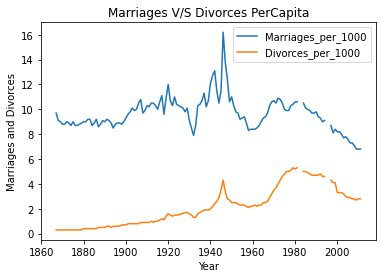

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

x_ax = us_marriage_divorce_data[["Year"]]
figure, ax = plt.subplots()

ax.plot(x_ax,us_marriage_divorce_data[["Marriages_per_1000"]])
ax.plot(x_ax,us_marriage_divorce_data[["Divorces_per_1000"]])

ax.set_title('Marriages V/S Divorces PerCapita')
ax.set_xlabel('Year')
ax.set_ylabel('Marriages and Divorces')

ax.legend(us_marriage_divorce_data[["Marriages_per_1000","Divorces_per_1000"]])

us_marriage_divorce_data

# Question 7

<p>Create a vertical bar chart comparing the number of marriages and divorces per</p>
<p>capita in the U.S. between 1900, 1950, and 2000.</p>
<p>Don't forget to label your axes!</p>

AttributeError: 'AxesSubplot' object has no attribute 'columns'

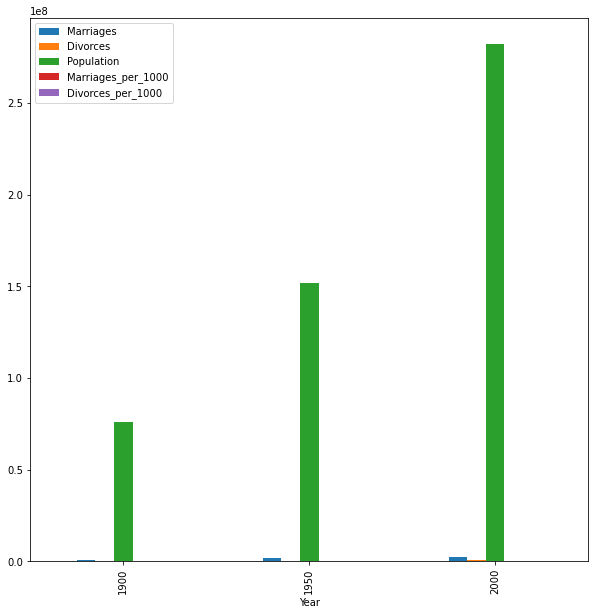

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

DATA=us_marriage_divorce_data[us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]
Chart = DATA.groupby("Year").sum().plot.bar(figsize=(10,10))

Chart.set_title('Marriages and Divorces per capita')
Chart.set_xlabel('Year')
Chart.set_ylabel('Marriages and Divorces')

# Question 8

<p>Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort</p>
<p>the actors by their kill count and label each bar with the corresponding actor's name.</p>
<p>Don't forget to label your axes!</p>

Text(0, 0.5, 'Kill Count')

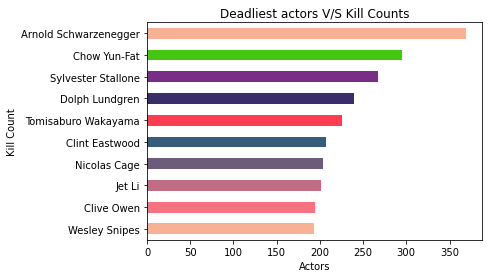

In [12]:
import pandas as pd

hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')

colors=['#F8B195','#F67280','#C06C84','#6C5B7B','#355C7D','#FF3D52','#392D6A','#792D86','#43C711']

bar = hollywood_actor_kills.groupby("Actor").Count.mean().sort_values().plot.barh(color=colors)
bar.set_title('Deadliest actors V/S Kill Counts')
bar.set_xlabel('Actors')
bar.set_ylabel('Kill Count')

# Question 9

<p>Create a pie chart showing the fraction of all Roman Emperors that were assassinated.</p>
<p>Make sure that the pie chart is an even circle, labels the categories, and shows the</p>
<p>percentage breakdown of the categories.</p>

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


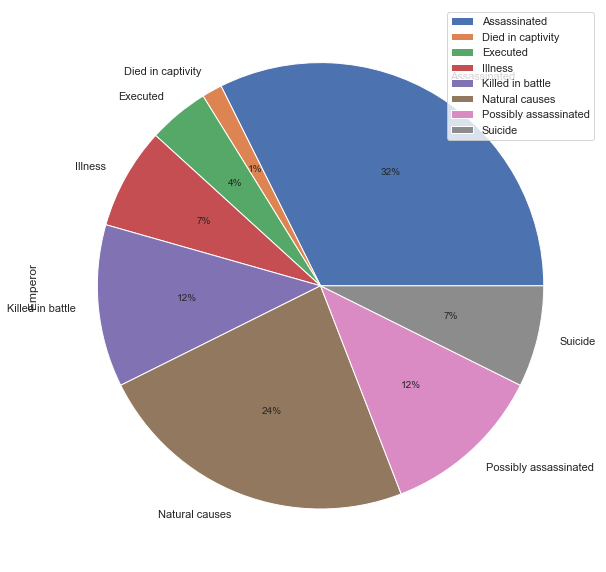

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
Kills = roman_emperors[["Emperor","Cause_of_Death"]].groupby("Cause_of_Death").count()
Sum = Kills[["Emperor"]].sum()
Kills.plot.pie(y="Emperor",figsize=(10,20),autopct='%1.0f%%')
roman_emperors

# Question 10

<p>Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.</p>
<p>Don't forget to label your axes!</p>
<p>Color each dot according to its year.</p>

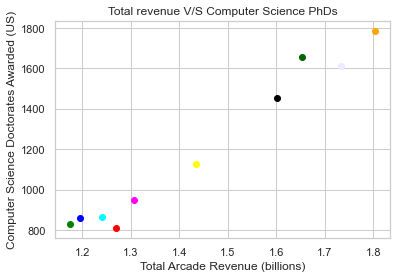

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

colors = {2000:'blue',2001:'green',2002:'red',2003:'cyan',2004:'magenta',2005:'yellow',2006:'black',2007:'darkgreen',2008:'orange',2009:'#eeeaff'}
arcade_revenue_cs_doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
fig, ax = plt.subplots()
for i in range(len(arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'])):
    ax.scatter(arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'][i], arcade_revenue_cs_doctorates['Computer Science Doctorates Awarded (US)'][i],color=colors[arcade_revenue_cs_doctorates['Year'][i]])

ax.set_title('Total revenue V/S Computer Science PhDs')
ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')